In [2]:
import os
os.environ['HF_HOME'] = '/share/data/drive_3/ketan/orc/HF_Cache_2'
from PIL import Image
import torch.nn.functional as F
import numpy as np
from surya.postprocessing.heatmap import draw_bboxes_on_image
import torch
from surya_yolo_pipeline_copy import suryolo

config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/120M [00:00<?, ?B/s]

Loaded detection model vikp/surya_layout2 on device cuda with dtype torch.float16


In [3]:

def plot_images_fine_tune(image_path:str):
    image  = Image.open(image_path)
    bboxes = suryolo(image_path)
    return draw_bboxes_on_image(bboxes,image)

In [4]:
from PIL import Image
from surya.layout import batch_layout_detection
from surya.model.detection.segformer import load_processor , load_model
from surya.settings import settings

original_model = load_model(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT)
original_processor = load_processor(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT)
original_model.eval()
"."

Loaded detection model vikp/surya_layout2 on device cuda with dtype torch.float16


preprocessor_config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

'.'

In [5]:
def plot_images_original (image_path:str) :

    layout_predictions = batch_layout_detection([Image.open(image_path)], original_model, original_processor,)
    bboxes = []
    for i in (layout_predictions)[0].bboxes :
        bboxes.append(i.bbox)
    return draw_bboxes_on_image(bboxes,Image.open(image_path))


In [6]:
import matplotlib.pyplot as plt

def plot_images_side_by_side(traditional, fine_tuned, save_path=None):
    
    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the first image
    axes[0].imshow(traditional)
    axes[0].axis('off')  # Turn off axis for a clean look
    axes[0].set_title("Traditional Model")

    # Plot the second image
    axes[1].imshow(fine_tuned)
    axes[1].axis('off')
    axes[1].set_title("Suryolo Layout Model")

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Save the figure at a high resolution (e.g., 300 DPI)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Display the images
    plt.show()

Detecting bboxes: 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


preprocessor_config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]


image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-11.jpg: 640x480 1 Page-footer, 1 Picture, 11 Texts, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 480)


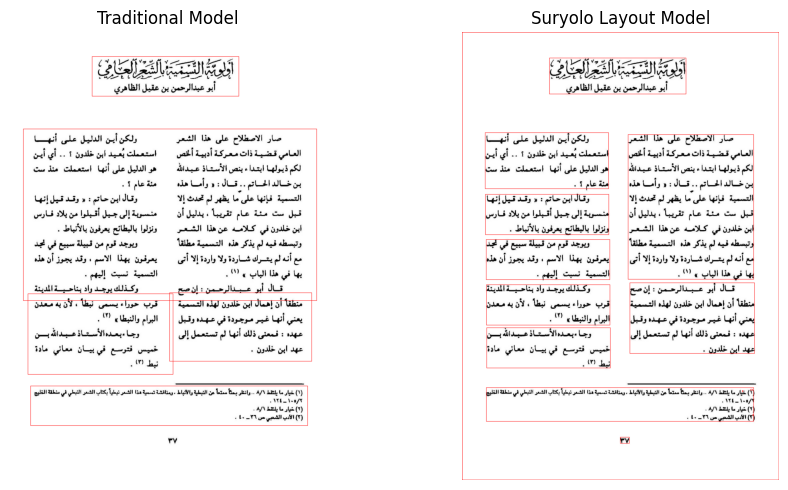

In [7]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-11.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-1.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-10.jpg: 640x480 1 Page-footer, 1 Table, 1 Text, 19.0ms
Speed: 2.4ms preprocess, 19.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


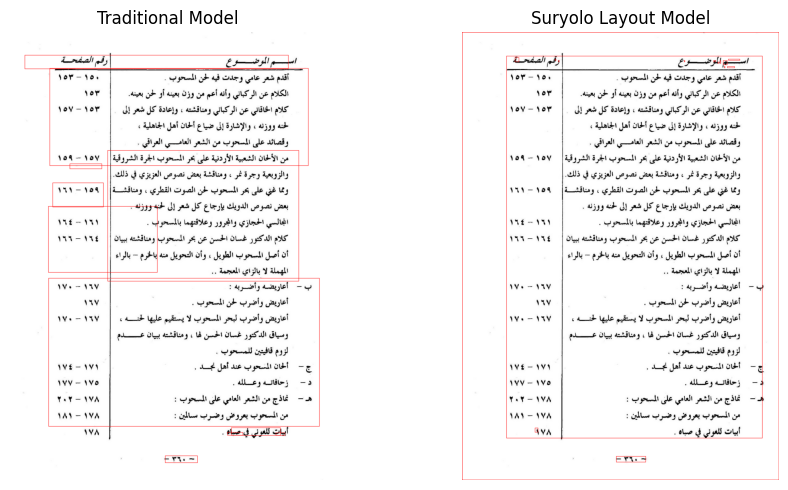

In [8]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-10.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-2.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-12.jpg: 640x480 1 Page-footer, 9 Texts, 14.4ms
Speed: 2.2ms preprocess, 14.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


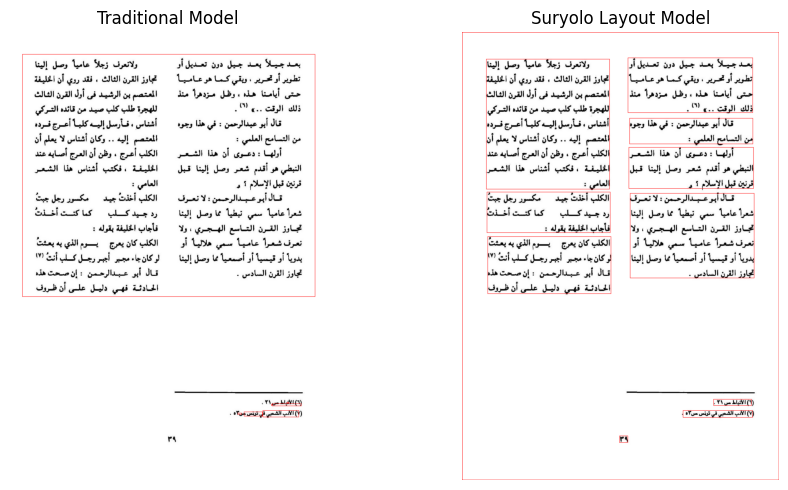

In [9]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-12.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-3.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-13.jpg: 640x480 1 Caption, 1 Page-footer, 7 Texts, 12.7ms
Speed: 2.4ms preprocess, 12.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)


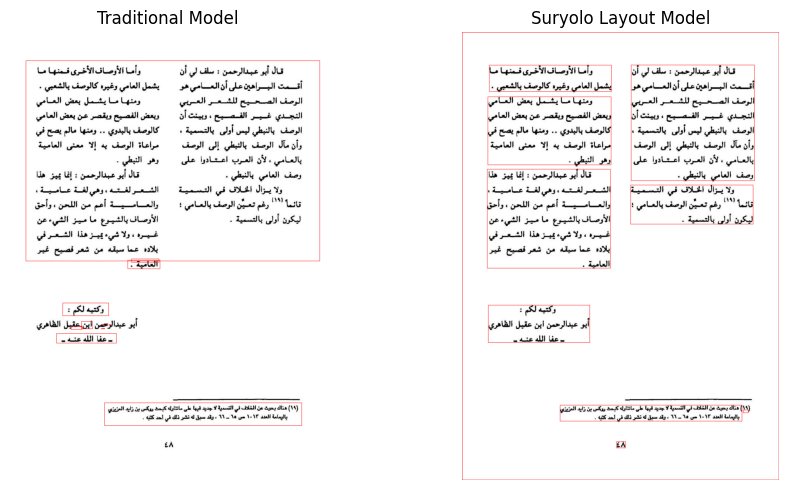

In [10]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-13.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-4.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-0.jpg: 640x480 1 Page-footer, 1 Section-header, 11 Texts, 13.8ms
Speed: 2.2ms preprocess, 13.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


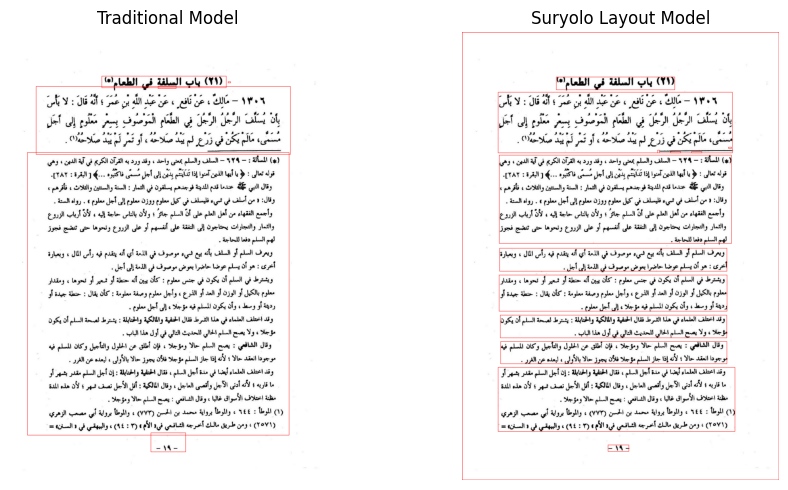

In [11]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-0.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-5.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-7.jpg: 640x480 1 Caption, 1 Page-footer, 1 Picture, 1 Section-header, 9 Texts, 14.2ms
Speed: 2.5ms preprocess, 14.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


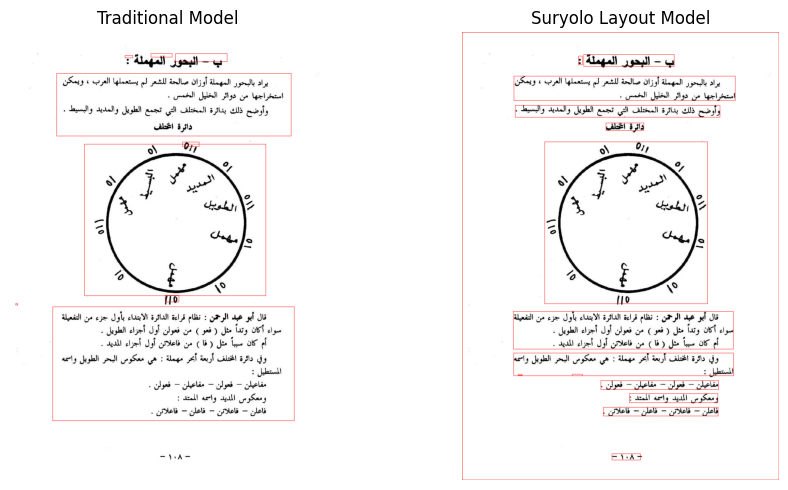

In [12]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-7.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-6.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-2.jpg: 640x480 1 Page-footer, 2 Pictures, 19 Texts, 13.5ms
Speed: 2.2ms preprocess, 13.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


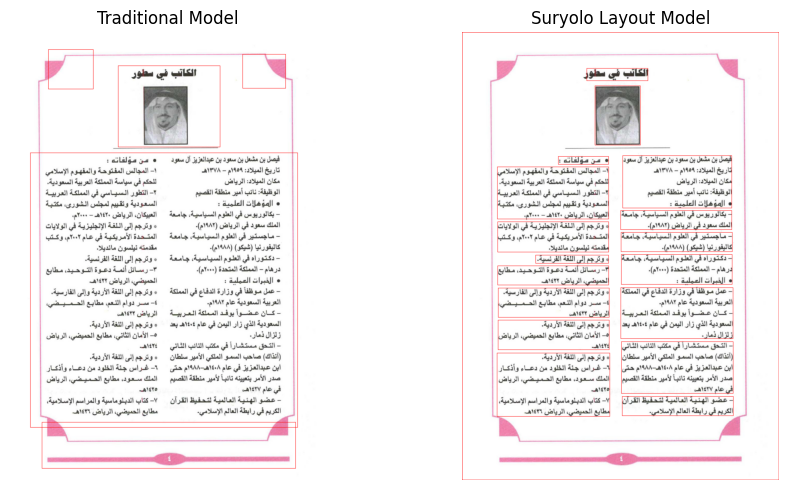

In [13]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-2.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-7.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-18.jpg: 640x480 2 Captions, 1 Page-footer, 2 Page-headers, 1 Picture, 1 Table, 6 Texts, 15.1ms
Speed: 2.3ms preprocess, 15.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


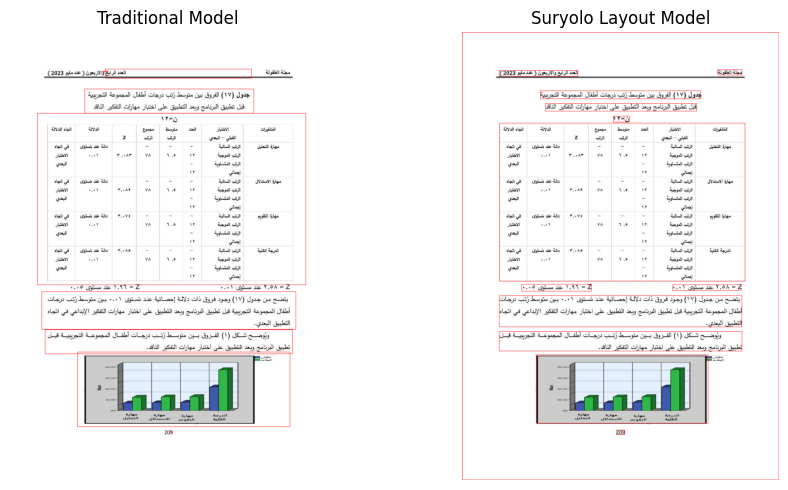

In [14]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/all_20_samples-images-18.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-8.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-19.jpg: 640x480 1 Picture, 1 Section-header, 17 Texts, 13.7ms
Speed: 2.2ms preprocess, 13.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


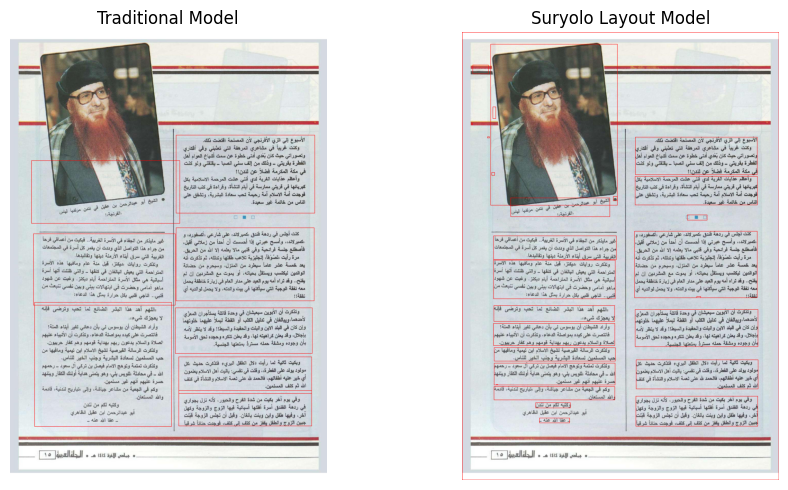

In [15]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-19.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-9.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)

Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]



image 1/1 /share/data/drive_3/ketan/orc/test-assests/0058_0-images-16.jpg: 640x480 10 Texts, 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


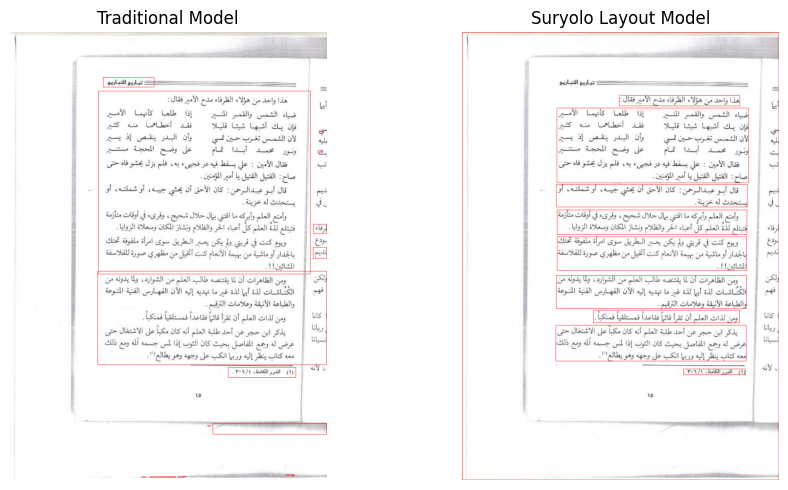

In [16]:
image_path = "/share/data/drive_3/ketan/orc/test-assests/0058_0-images-16.jpg"
save_dir = "/share/data/drive_3/ketan/orc/suryolo-arabic-layout/results/layout-benchmark-results-images-10.jpg"
# save_dir = None
original = plot_images_original(image_path)
fine_tuned = plot_images_fine_tune(image_path)
plot_images_side_by_side(original, fine_tuned ,save_dir)